Task 

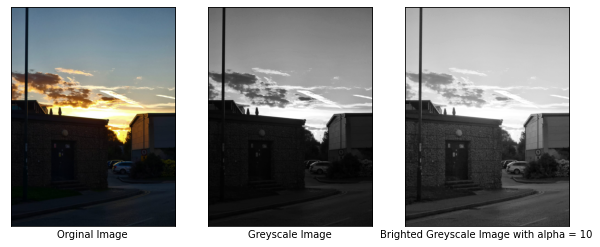

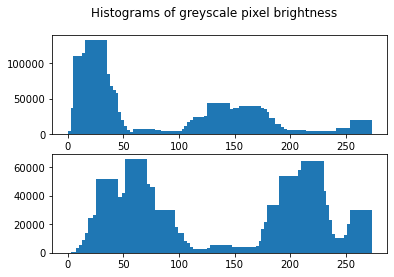

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from loading_and_plotting_data import load_grey_image

def plot_org_vs_grey_image(plot_histrogram, image, alpha):

    orginal_image, greyscale_image = load_grey_image(image=image)
    edit_greyscale_image = np.log(1 + alpha * greyscale_image) / np.log(1 + alpha)

    N = 3 # num of subplots in figure
    fig, ax = plt.subplots(1, N, figsize=(10, 6))

    ax[0].imshow(orginal_image)
    ax[0].set_xlabel('Orginal Image')
    
    ax[1].imshow(greyscale_image, cmap='gray')
    ax[1].set_xlabel('Greyscale Image')

    ax[2].imshow(edit_greyscale_image, cmap='gray')
    ax[2].set_xlabel('Brighted Greyscale Image with alpha = '+ str(alpha))
    
    for i in range(0, N):
        ax[i].set_xticks([])
        ax[i].axes.get_yaxis().set_visible(False)
    
    plt.savefig('Images/greyscale_image.jpeg')
    # add a close button to the plt figure    

    if plot_histrogram == True:
        fig_2, ax_2 = plt.subplots(2)

        hist, bin_edges = np.histogram(greyscale_image * 256, bins=100, range=(0, 256))
        ax_2[0].bar(bin_edges[0:-1], hist, align='edge', width=20)
        ax_2[0].ticklabel_format(style='plain')
        ax_2[0].set_xlabel('Orginal image')

        hist, bin_edges = np.histogram(edit_greyscale_image * 256, bins=100, range=(0, 256))
        ax_2[1].bar(bin_edges[0:-1], hist, align='edge', width=20)
        ax_2[1].ticklabel_format(style='plain')
        ax_2[0].set_xlabel('Brighted image')

        fig_2.suptitle('Histograms of greyscale pixel brightness')
        fig_2.savefig('Images/histrogram_image.jpeg')
    plt.show()


plot_org_vs_grey_image(plot_histrogram=True, image='gym', alpha=10)

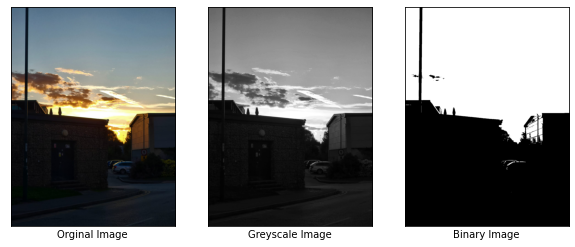

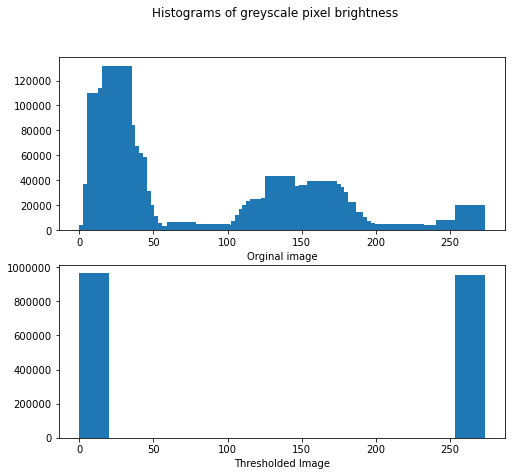

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from loading_and_plotting_data import load_grey_image

def segment_image(plot_histrogram, image, threshold):

    orginal_image, greyscale_image = load_grey_image(image=image)

    N = 3
    fig, ax = plt.subplots(1, N, figsize=(10, 6))
    edit_greyscale_image = np.where(greyscale_image > threshold / 256, greyscale_image, 0)
    edit_greyscale_image = np.where(greyscale_image < threshold / 256, edit_greyscale_image, 1)

    ax[0].imshow(orginal_image)
    ax[0].set_xlabel('Orginal Image')
    
    ax[1].imshow(greyscale_image, cmap='gray')
    ax[1].set_xlabel('Greyscale Image')

    ax[2].imshow(edit_greyscale_image, cmap='gray')
    ax[2].set_xlabel('Binary Image')

    for i in range(0, N):
        ax[i].set_xticks([])
        ax[i].axes.get_yaxis().set_visible(False)
    
    plt.savefig('Images/binary_image.jpeg')

    if plot_histrogram == True:
        fig_2, ax_2 = plt.subplots(2, figsize=(8, 7))

        hist, bin_edges = np.histogram(greyscale_image * 256, bins=100, range=(0, 256))
        ax_2[0].bar(bin_edges[0:-1], hist, align='edge', width=20)
        ax_2[0].ticklabel_format(style='plain')
        ax_2[0].set_xlabel('Orginal image')

        hist, bin_edges = np.histogram(edit_greyscale_image * 256, bins=100, range=(0, 256))
        ax_2[1].bar(bin_edges[0:-1], hist, align='edge', width=20)
        ax_2[1].ticklabel_format(style='plain')
        ax_2[1].set_xlabel('Thresholded Image')
        
        fig_2.suptitle('Histograms of greyscale pixel brightness')
        fig_2.savefig('Images/histrogram_binary_image.jpeg')
    plt.show()


# for gym image, use threshold=60
segment_image(plot_histrogram=True, image='gym', threshold=60)